In [1]:
# import ratatouille
from ratatouille import plotutils as put
from ratatouille import maps

# imports others
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.size'] = 14

---

# 0 - Intro
Here are presented most of the functions from plotutils.   
The logic used is to read/compute the quantities in a function or more (depending on the complexity), plot them in another one and then combine those to be able plot directly from one or more simulations (to plot one use an array of length 1...). Only showed the latest one to avoid redundancy but feel free to explore.

In [3]:
# If multiple simulations are compared.
genpath = '/mnt/lyoccf/scratch/mrey/outputs/3_ramcral/'
folders = ['2_Rex/5_m_star=0.4_n_star=25/', '1_Mau/2_sf_lam=4/','3_Kan/1_weak/']

# If only one simulation is needed
RamsesDir = genpath + folders[0]

# Labels for the plots + timestep used for some of them.
labels = ['Agertz', 'Kimm', 'Kretschmer']
timestep  = 17
timesteps = [13,14,15,16,17,18] # When the plot stacks several outputs.

---

# 1 - Phase diagrams

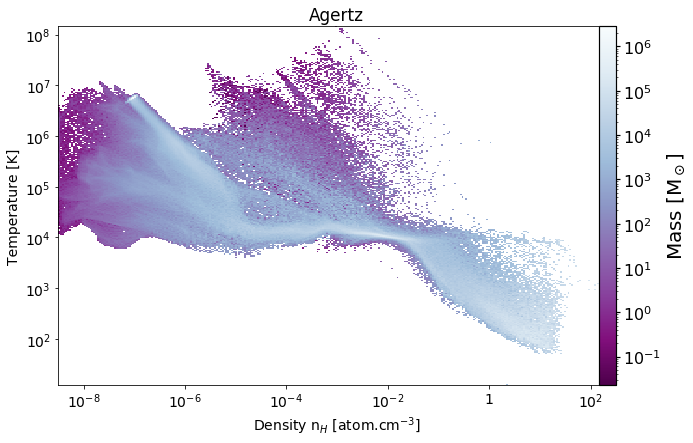

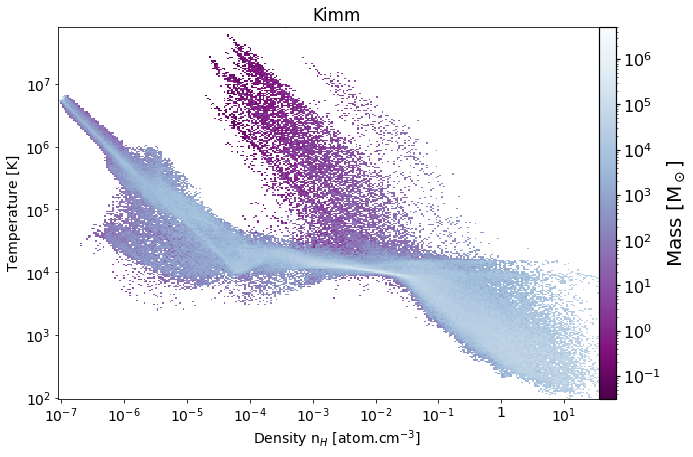

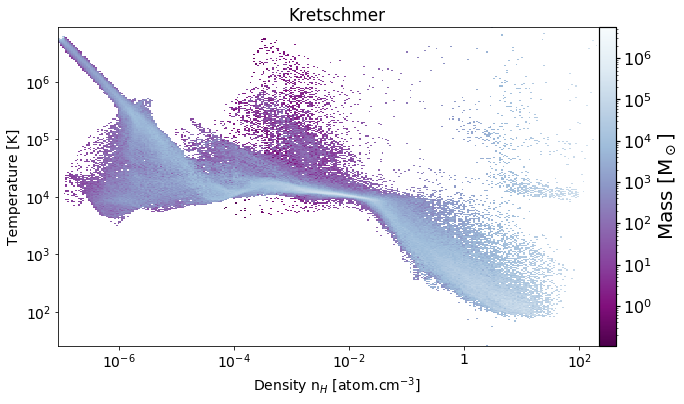

In [4]:
# Compare the phase diagram of different simulations at the same timestep.
put.plot_phase_diag(genpath, folders, timestep, labels, bins=300, plot_lims=None, \
                     vmin=None, vmax=None, factor=1, saveinfile=True, savefig=False)

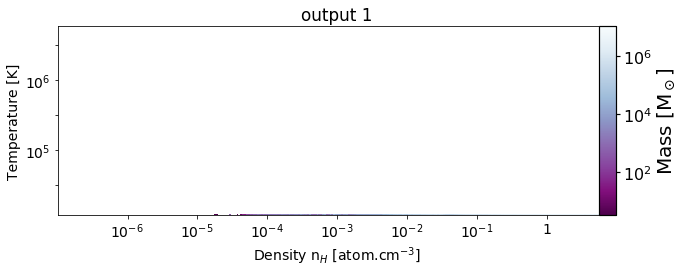

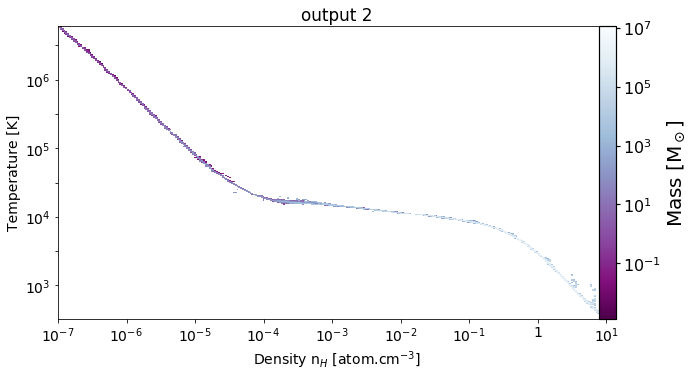

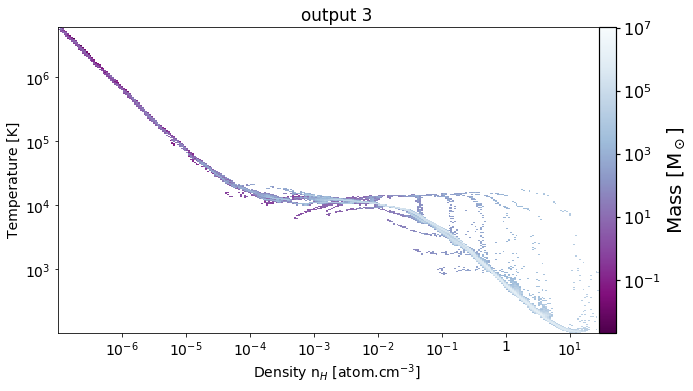

In [5]:
# Plot the phase diagrams for all timesteps of a simulation up to max_timestep.
max_timestep = 3
put.plot_evol_phase_diag(RamsesDir, max_timestep, bins=300, plot_lims=None, \
                     vmin=None, vmax=None, factor=1, savefig=False, saveinfile=True)

---

# 2 - Probability Density Function

There are also functions to plot the PDF as an histogram (I choose the line by default), to plot different quantities side by side (quite useless), the cumulative (or survival) function

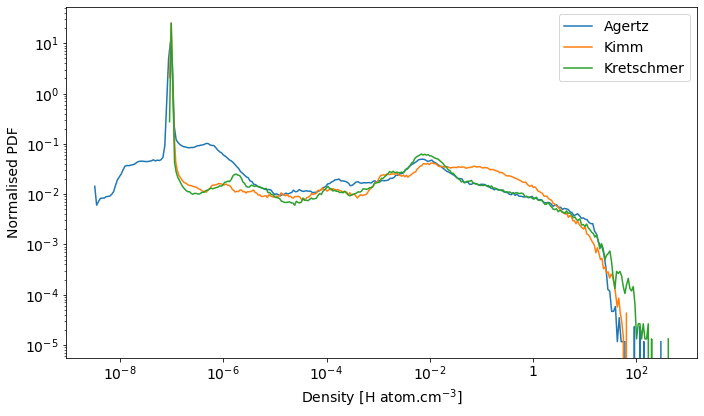

In [6]:
put.plot_pdfs2('nH', genpath, folders, timestep, labels, weight=None, density=True, bins=300, \
x_log=True, y_log=True, xlims=None, ylims=None, factor=1, savefig=False, saveinfile=True)

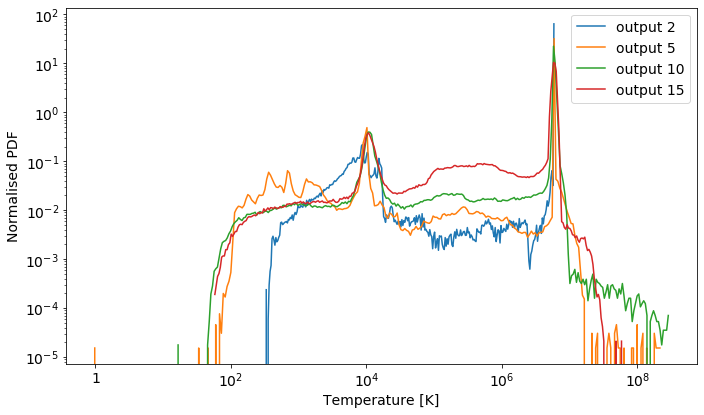

In [7]:
# Plot the PDFs for all timesteps of a simulation up to max_timestep.
outputs2plot = [2,5,10,15]
put.plot_evol_pdf("T", RamsesDir, outputs2plot, weight=None, density=True, bins=300, \
    x_log=True, y_log=True, xlims=None, ylims=None, factor=1, savefig=False, saveinfile=True)

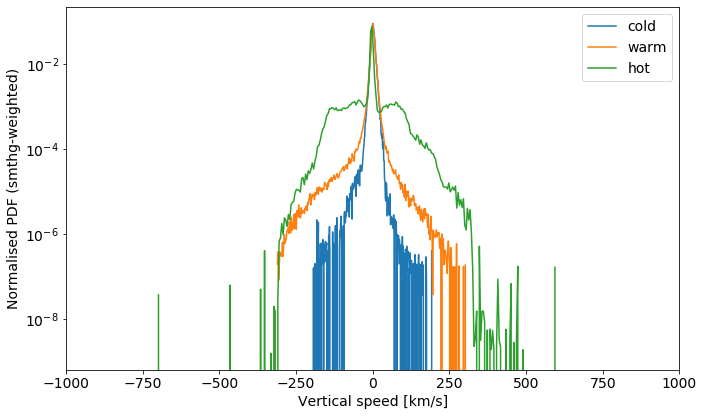

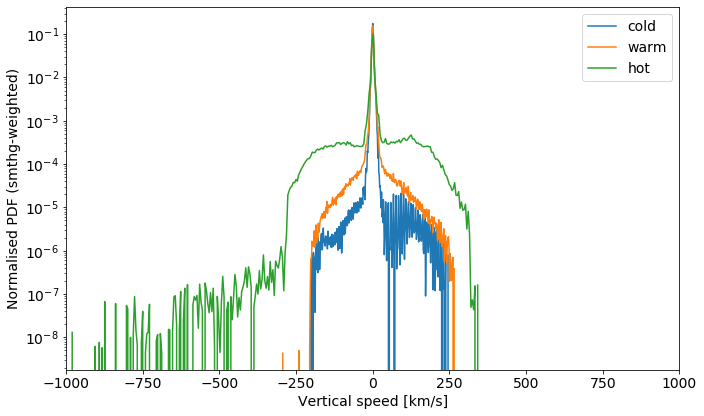

In [8]:
# The boundary values for the 3 temperature domains are hardcoded but can still be changed ! 
put.pdf_split_t('vz', 'mass', genpath, folders, timestep, density=True, bins=300, adapt_bins=False, \
    x_log=False, y_log=True, xlims=[-1000,1000], ylims=None, factor=1, savefig=False, saveinfile=True)

In [9]:
# # This one is weird and probably wrong
# # Same as before but stacked over some timesteps.
# put.pdf_split_t_stack('vz', 'mass', genpath, folders, timesteps, density=True, bins=300, \
#     x_log=True, y_log=True, xlims=None, ylims=None, factor=1, savefig=False, saveinfile=True)

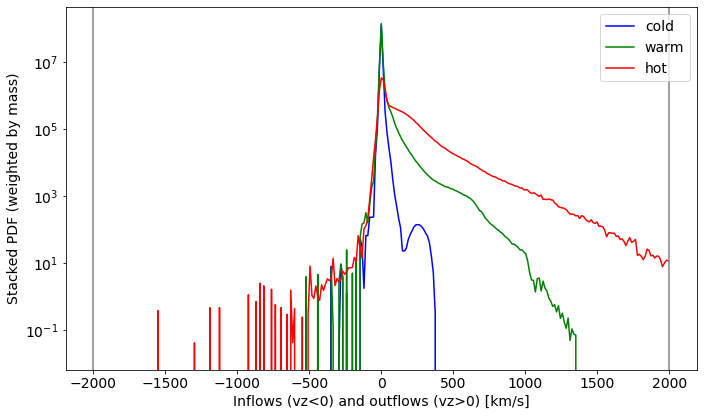

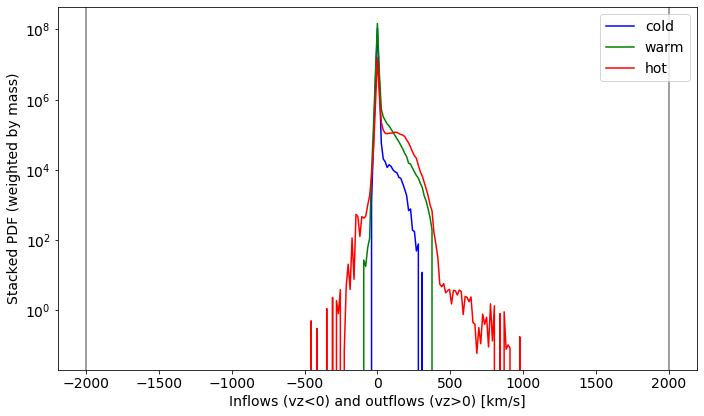

In [10]:
put.pdf_in_out_flow_T(genpath, folders, timesteps, bins=300, y_log=True, xlims=None, ylims=None, \
    factor=1, savefig=False, saveinfile=True)

In [11]:
put.pdf_in_out_flow(genpath, folders, timesteps, labels, bins=300, \
    y_log=True, xlims=None, ylims=None, factor=1, savefig=False, saveinfile=True)

---

# 3 - Star Formation Rate

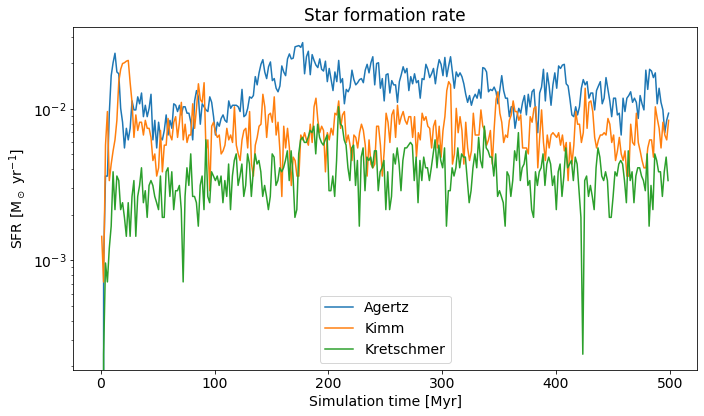

In [12]:
put.plot_sfr(genpath, folders, timestep, labels, hist_lims=None, bins=300, \
    y_log=True, xlims=None, ylims=None, factor=1, savefig=False, saveinfile=True)

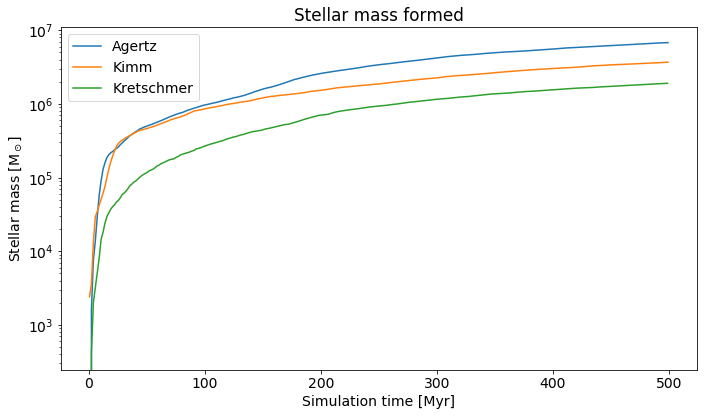

In [13]:
put.plot_mass_evol(genpath, folders, timestep, labels, hist_lims=None, bins=300, \
    xlims=None, ylims=None, factor=1, savefig=False, saveinfile=True)

---

# 4 - Kennicutt Schmidt
One of the steps to plot the KS relation is to compute sigma_gas and is to rebin. I have tested 4 methods which I compared in another notebook and I deemed method '4' to be the best one.

In [14]:
rad_kpc = 1         # [kpc]
binsize_aim = 1.    # [kpc]
lim_sfr = 100       # [Myr]

The size of the bins is ~ 0.982 kpc
Eq is 2.86 * Sig_gas + -6.30
The size of the bins is ~ 0.982 kpc
Eq is 2.16 * Sig_gas + -5.73
The size of the bins is ~ 0.982 kpc
Eq is 2.31 * Sig_gas + -6.31


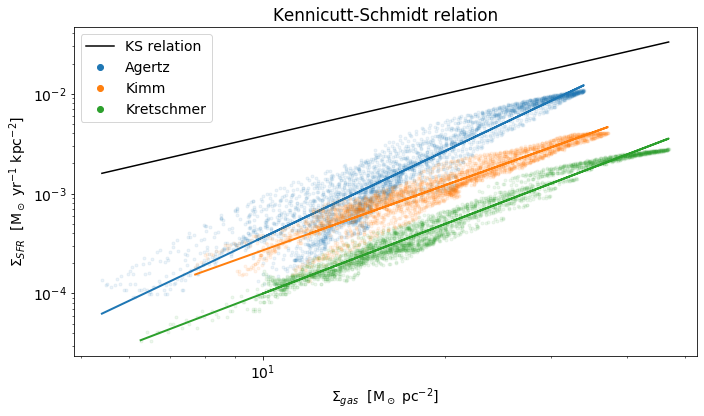

In [15]:
# The solid lines are a linear fit of the data set.
put.plot_KS(genpath, folders, timestep, labels, binsize_aim, lim_sfr, rad_kpc, rebin='4', \
    thresh=None, IMF='Chabrier', logscale=True, plot_data=True, saveinfile=True)

The size of the bins is ~ 0.982 kpc
The size of the bins is ~ 0.982 kpc
The size of the bins is ~ 0.982 kpc


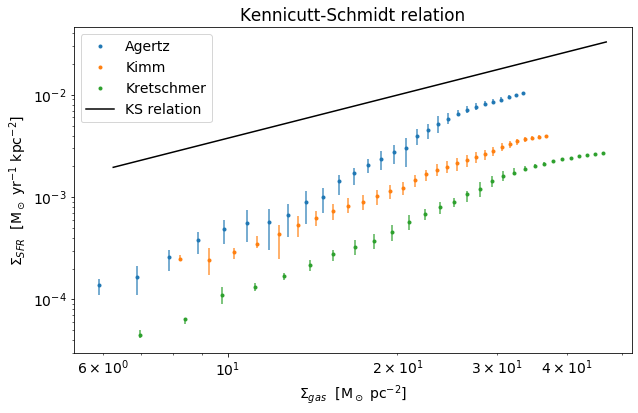

In [16]:
# The error bars are hardcoded to 25% and 75%.
put.plot_KS_better(genpath, folders, timestep, labels, binsize_aim, lim_sfr, rad_kpc, nbbins=30, rebin='4', \
    thresh=None, IMF='Chabrier', logscale=True, plot_err=True, plot_data=False, xlims=None, ylims=None, saveinfile=True)

---

# 5 - Plot Outflows

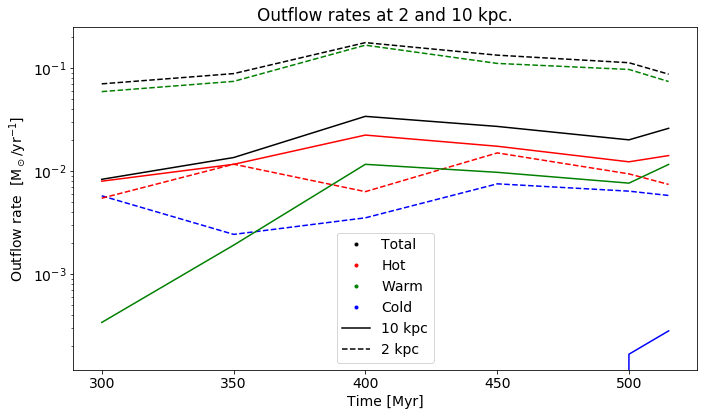

In [19]:
put.plot_outflows_T(RamsesDir, timesteps, dist_kpc=[2,10], xlims=None, ylims=None, y_log=True, \
                         savefig=False, verbose=False)

In [21]:
put.plot_outflows(genpath, folders, timesteps, labels, dist_kpc=[2,10], xlims=None, ylims=None, \
                            y_log=True, savefig=False, verbose=False)

 Done [##################################################] 100%  


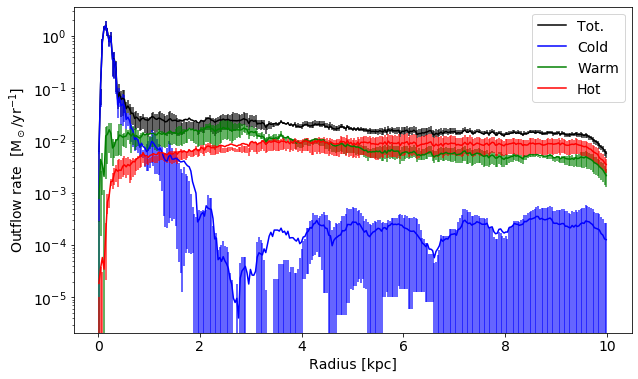

In [22]:
method = 'spheres'
put.plot_outflows_allrad(RamsesDir, timesteps, 10, method, maxangle=65, plot_error=True, \
                         xlims=None, ylims=None, factor=1, savefig=False)

---

# 6 - Mass loading

In [23]:
put.plot_mass_load(genpath, folders, timesteps, dist_kpc, labels, xlims=None, ylims=None, y_log=True, savefig=False)

---

It is also possible to restrict cells to those containing stars only. This is detailed in the notebook `1_ras_maps_k-d_tree`.